In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

import mglearn
from dashboard_one import *

In [2]:
df = pd.read_csv('main_file.csv').iloc[:,1:]
com_col = ['Phase','RID','VISCODE']
df

C:\Users\weipi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,...,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5,DX_bl
0,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,NaN,...,0.0,1.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,CN
1,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,7.0,7.0,9.0,10.0,11.0,CN
2,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,5.0,9.0,9.0,9.0,8.0,CN
3,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,0.0,2.0,1.0,15.0,6.0,6.0,6.0,8.0,8.0,CN
4,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27115,7102,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,341_S_7102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27116,7103,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,013_S_7103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27117,7104,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,153_S_7104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27118,7105,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,035_S_7105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['PTAU'].dropna()

27       22.83
29       24.18
33       13.29
35        13.3
40       33.43
         ...  
23350    53.65
23363    36.39
23365    40.95
23391     8.53
23397     20.9
Name: PTAU, Length: 2369, dtype: object

In [4]:
npi=pd.read_csv('npi_short.csv').iloc[:,1:]
npi

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,NaN
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,NaN
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,NaN
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,ADNI3,6449,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2661,ADNI3,6516,y3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2662,ADNI3,6654,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2663,ADNI3,6820,y2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [5]:
npi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Phase    2665 non-null   object 
 1   RID      2665 non-null   int64  
 2   VISCODE  2665 non-null   object 
 3   NPIK1    1326 non-null   float64
 4   NPIK2    1325 non-null   float64
 5   NPIK3    1323 non-null   float64
 6   NPIK4    1322 non-null   float64
 7   NPIK5    1323 non-null   float64
 8   NPIK6    1325 non-null   float64
 9   NPIK7    1325 non-null   float64
 10  NPIK8    1318 non-null   float64
 11  NPIK9A   1326 non-null   float64
 12  NPIK9B   1327 non-null   float64
 13  NPIK9C   1326 non-null   float64
 14  NPIKTOT  1325 non-null   float64
 15  NPIKSEV  1276 non-null   float64
dtypes: float64(13), int64(1), object(2)
memory usage: 333.2+ KB


In [6]:
npi.describe()

,RID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV
count,2665.000000,1326.000000,1325.000000,1323.000000,1322.000000,1323.000000,1325.000000,1325.000000,1318.000000,1326.000000,1327.000000,1326.000000,1325.000000,1276.000000
mean,2798.812008,0.441176,0.541132,0.057445,0.223903,0.046107,0.218113,0.290566,0.125948,2.665913,1.360211,1.150830,3.822642,1.438871
std,2137.923372,0.496715,0.498493,0.232779,0.417016,0.209797,0.413121,0.454195,0.331917,1.026810,0.585019,1.206221,2.622140,0.616271
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,802.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000
50%,2201.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000
75%,4638.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,4.000000,2.000000
max,7100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,5.000000,12.000000,3.000000


In [7]:
sleep = npi.merge(df[com_col + ['OSA','insomnia']],how='outer',on=com_col).dropna(axis=1, how='all')
sleep

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,OSA,insomnia
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,NaN,0.0,1.0
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,NaN,0.0,1.0
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN,0.0,1.0
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,NaN,0.0,1.0
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27115,ADNI3,7102,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27116,ADNI3,7103,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27117,ADNI3,7104,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27118,ADNI3,7105,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [8]:
abeta_insom = df[com_col + ['ABETA']].dropna(subset=['ABETA'])  # drop rows where abeta not available
tau_insom = df[com_col + ['TAU']].dropna(subset=['TAU'])
ptau_insom = df[com_col + ['PTAU']].dropna(subset=['PTAU'])

left merge 'sleep' table to biomarker table. As it doesn't not make sense to use the datapoint where biomarker not available.

In [9]:
abeta_insom_npi = abeta_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all') # drop the columns where all are na
tau_insom_npi = tau_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all')
ptau_insom_npi = ptau_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all')

all NPIK questions and total score are not available for biomarkers. In the sleep data, only the 'insomnia','npiksev','OSA' are available for abeta,tau,ptau analysis

In [10]:
abeta_insom_npi.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 2621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2622 non-null   object 
 1   RID       2622 non-null   int64  
 2   VISCODE   2318 non-null   object 
 3   ABETA     2622 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2622 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.9+ KB


In [11]:
tau_insom_npi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 2621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2622 non-null   object 
 1   RID       2622 non-null   int64  
 2   VISCODE   2318 non-null   object 
 3   TAU       2622 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2622 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.9+ KB


In [12]:
ptau_insom_npi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2621 entries, 0 to 2620
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2621 non-null   object 
 1   RID       2621 non-null   int64  
 2   VISCODE   2317 non-null   object 
 3   PTAU      2621 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2621 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.8+ KB


ABETA

In [13]:
#split dataframe into two, one include the TAU value as float, another include TAU value as string, i.e. '>8',...
abeta_num = drop_char_float(abeta_insom_npi,"ABETA")
abeta_str = abeta_insom_npi.drop(abeta_num.index,axis=0) 
print(len(abeta_str) + len(abeta_num) == len(abeta_insom_npi),abeta_num,abeta_str)   #check 

True       Phase   RID VISCODE   ABETA  NPIKSEV  OSA  insomnia
0     ADNI1     3      bl   741.5      NaN  0.0       1.0
1     ADNI1     3     m12   601.4      NaN  0.0       1.0
2     ADNI1     4      bl  1501.0      NaN  0.0       1.0
3     ADNI1     4     m12  1176.0      1.0  0.0       1.0
4     ADNI1     5      bl   547.3      NaN  0.0       1.0
...     ...   ...     ...     ...      ...  ...       ...
2617  ADNI2  5290     m24   815.0      NaN  0.0       NaN
2618  ADNI2  5292      bl   928.3      NaN  0.0       NaN
2619  ADNI2  5292     m24   915.4      NaN  0.0       NaN
2620  ADNI2  5295      bl   416.8      NaN  0.0       NaN
2621  ADNI2  5296      bl  1460.0      NaN  0.0       NaN

[2234 rows x 7 columns]       Phase   RID VISCODE  ABETA  NPIKSEV  OSA  insomnia
6     ADNI1     8      bl  >1700      NaN  0.0       1.0
7     ADNI1     8     m12  >1700      NaN  0.0       1.0
13    ADNI1    19      bl  >1700      NaN  0.0       1.0
14    ADNI1    19     m12  >1700      NaN  0.0

TAU

In [14]:
#split dataframe into two, one include the TAU value as float, another include TAU value as string, i.e. '>8',...
tau_num = drop_char_float(tau_insom_npi,"TAU")
tau_str = tau_insom_npi.drop(tau_num.index,axis=0) 
len(tau_str) + len(tau_num) == len(tau_insom_npi),tau_num,tau_str   #check 

(True,
       Phase   RID VISCODE     TAU  NPIKSEV  OSA  insomnia
 0     ADNI1     3      bl  239.70      NaN  0.0       1.0
 1     ADNI1     3     m12  251.70      NaN  0.0       1.0
 2     ADNI1     4      bl  153.10      NaN  0.0       1.0
 3     ADNI1     4     m12  159.70      1.0  0.0       1.0
 4     ADNI1     5      bl  337.00      NaN  0.0       1.0
 ...     ...   ...     ...     ...      ...  ...       ...
 2617  ADNI2  5290     m24  490.10      NaN  0.0       NaN
 2618  ADNI2  5292      bl  375.70      NaN  0.0       NaN
 2619  ADNI2  5292     m24  394.90      NaN  0.0       NaN
 2620  ADNI2  5295      bl   88.69      NaN  0.0       NaN
 2621  ADNI2  5296      bl  224.90      NaN  0.0       NaN
 
 [2613 rows x 7 columns],
       Phase   RID VISCODE    TAU  NPIKSEV  OSA  insomnia
 667   ADNI1   590      bl  >1300      NaN  0.0       0.0
 776   ADNI1   691      bl    <80      NaN  0.0       1.0
 777   ADNI1   691     m12    <80      NaN  0.0       1.0
 778   ADNI1   692      b

PTAU

In [15]:
#split dataframe into two, one include the PTAU value as float, another include PTAU value as string, i.e. '>8',...
ptau_num = drop_char_float(ptau_insom_npi,"PTAU")
ptau_str = ptau_insom_npi.drop(ptau_num.index,axis=0) 
len(ptau_str) + len(ptau_num) == len(ptau_insom_npi),ptau_num,ptau_str   #check 

(True,
       Phase   RID VISCODE   PTAU  NPIKSEV  OSA  insomnia
 0     ADNI1     3      bl  22.83      NaN  0.0       1.0
 1     ADNI1     3     m12  24.18      NaN  0.0       1.0
 2     ADNI1     4      bl  13.29      NaN  0.0       1.0
 3     ADNI1     4     m12  13.30      1.0  0.0       1.0
 4     ADNI1     5      bl  33.43      NaN  0.0       1.0
 ...     ...   ...     ...    ...      ...  ...       ...
 2616  ADNI2  5290     m24  53.65      NaN  0.0       NaN
 2617  ADNI2  5292      bl  36.39      NaN  0.0       NaN
 2618  ADNI2  5292     m24  40.95      NaN  0.0       NaN
 2619  ADNI2  5295      bl   8.53      NaN  0.0       NaN
 2620  ADNI2  5296      bl  20.90      NaN  0.0       NaN
 
 [2609 rows x 7 columns],
       Phase   RID VISCODE  PTAU  NPIKSEV  OSA  insomnia
 667   ADNI1   590      bl  >120      NaN  0.0       0.0
 776   ADNI1   691      bl    <8      NaN  0.0       1.0
 777   ADNI1   691     m12    <8      NaN  0.0       1.0
 778   ADNI1   692      bl    <8      NaN

In [16]:
abeta_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2234 non-null   object 
 1   RID       2234 non-null   int64  
 2   VISCODE   1975 non-null   object 
 3   ABETA     2234 non-null   float64
 4   NPIKSEV   165 non-null    float64
 5   OSA       2234 non-null   float64
 6   insomnia  935 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 139.6+ KB


### upennmaster

<AxesSubplot:xlabel='NPIKSEV', ylabel='PTAU'>

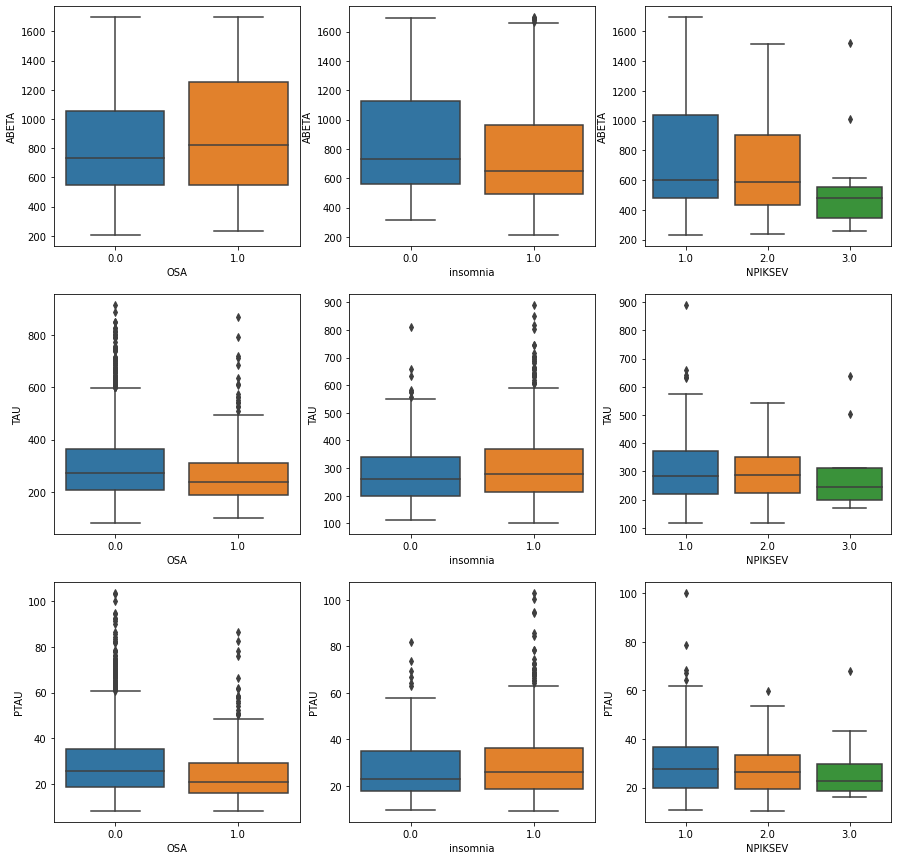

In [17]:
cols = ['OSA','insomnia','NPIKSEV']
f, axes = plt.subplots(3, 3)
f.set_size_inches(15, 15) 
sns.boxplot(y='ABETA', x= cols[0], data=abeta_num, orient='v', ax=axes[0][0])
sns.boxplot(y='ABETA', x= cols[1], data=abeta_num, orient='v', ax=axes[0][1])
sns.boxplot(y='ABETA', x= cols[2], data=abeta_num, orient='v', ax=axes[0][2])
sns.boxplot(y='TAU', x= cols[0], data=tau_num, orient='v', ax=axes[1][0])
sns.boxplot(y='TAU', x= cols[1], data=tau_num, orient='v', ax=axes[1][1])
sns.boxplot(y='TAU', x= cols[2], data=tau_num, orient='v', ax=axes[1][2])
sns.boxplot(y='PTAU', x= cols[0], data=ptau_num, orient='v', ax=axes[2][0])
sns.boxplot(y='PTAU', x= cols[1], data=ptau_num, orient='v', ax=axes[2][1])
sns.boxplot(y='PTAU', x= cols[2], data=ptau_num, orient='v', ax=axes[2][2])

From the plots it is hard to see that OSA, or insomnia, or NPIKSEV parameters have any correlation with the biomarkers.There are a small difference at NPIKSEV vs ABETA, where the NPIKSEV=3 the ABETA value is lower than the other two levels. 

### Try to fit with linear regression

In [18]:
def lin_model(df,target_col,var_cols,method,para_lst):
    '''
    split dataset to training and test groups (4:1),fit linear models by training data and return scores 
    df: dataframe
    target_col: the column which we want to predict
    var_cols: columns we want to use in the model
    method: Ridge, or Lasso, or LogisticRegression...
    para_lst: a list which contains different values of regularization parameter alpha or C
    '''
    train, test = train_test_split(df.dropna(axis=0,how='any'),test_size=0.2)    
    X_train = train[var_cols]
    y_train = train[target_col]
    X_test = test[var_cols]
    y_test = test[target_col]
    
    #print(train.describe())
    #print(test.describe())
    for i in range(len(para_lst)): 
        if method == LogisticRegression:
            model = LogisticRegression(C = para_lst[i]).fit(X_train,y_train) 
        else:            
            model = method(alpha = para_lst[i]).fit(X_train,y_train) # ridge model
        print('parameter: {}, Training set score: {}, Test set score: {}'.format(para_lst[i],model.score(X_train,y_train),model.score(X_test,y_test)))

In [19]:
a = [0.001,0.01,0.1,1,10,100]
lin_model(df=abeta_num,target_col='ABETA',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=abeta_num,target_col='ABETA',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.03235370620889133, Test set score: 0.02739435121441669
parameter: 0.01, Training set score: 0.03235370118368497, Test set score: 0.02737678049683112
parameter: 0.1, Training set score: 0.03235320561380883, Test set score: 0.027202569422796974
parameter: 1, Training set score: 0.032309750501199774, Test set score: 0.025599412733485094
parameter: 10, Training set score: 0.030484379711947507, Test set score: 0.017189838835323767
parameter: 100, Training set score: 0.016098792606982437, Test set score: 0.007042712441701182
parameter: 0.001, Training set score: 0.042128288039326334, Test set score: 0.003709290196343362
parameter: 0.01, Training set score: 0.0421282704922924, Test set score: 0.003735295725400878
parameter: 0.1, Training set score: 0.04212651504392895, Test set score: 0.003993233582530342
parameter: 1, Training set score: 0.041950962757779875, Test set score: 0.0063608688092730015
parameter: 10, Training set score: 0.024395656165411395,

In [20]:
lin_model(df=tau_num,target_col='TAU',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=tau_num,target_col='TAU',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.03487240817043247, Test set score: -0.07115471527212991
parameter: 0.01, Training set score: 0.03487239565210454, Test set score: -0.07108510374288146
parameter: 0.1, Training set score: 0.034871157842986, Test set score: -0.07039496160767134
parameter: 1, Training set score: 0.03476018947260373, Test set score: -0.06404653922068859
parameter: 10, Training set score: 0.030035782704905145, Test set score: -0.03095206437993303
parameter: 100, Training set score: 0.009674481559391435, Test set score: -0.0051694883585231555
parameter: 0.001, Training set score: 0.01712517028103222, Test set score: 0.01995576411785882
parameter: 0.01, Training set score: 0.017125053705668414, Test set score: 0.02002534405921763
parameter: 0.1, Training set score: 0.017113397968708477, Test set score: 0.020710849241223128
parameter: 1, Training set score: 0.015947842266933132, Test set score: 0.02653647790304081
parameter: 10, Training set score: 0.0, Test set score: -

In [21]:
lin_model(df=ptau_num,target_col='PTAU',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=ptau_num,target_col='PTAU',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.023492853656225998, Test set score: -0.013314074436912238
parameter: 0.01, Training set score: 0.023492846464812867, Test set score: -0.013298808370205473
parameter: 0.1, Training set score: 0.023492134745450977, Test set score: -0.013147565561531627
parameter: 1, Training set score: 0.023427795067377355, Test set score: -0.011766675247158132
parameter: 10, Training set score: 0.020546715050159925, Test set score: -0.005209246531790557
parameter: 100, Training set score: 0.006970623636937345, Test set score: -0.005289257225077781
parameter: 0.001, Training set score: 0.04557990428603553, Test set score: -0.21090936220676304
parameter: 0.01, Training set score: 0.045569241139594596, Test set score: -0.2093973160794751
parameter: 0.1, Training set score: 0.04503642790216056, Test set score: -0.19260618677952368
parameter: 1, Training set score: 0.016621527302399408, Test set score: -0.06683629557843429
parameter: 10, Training set score: 0.0, Test s

Sckit-learn's LinearRegression scores uses 𝑅2 score. A negative 𝑅2 means that the model fitted your data extremely bad.

With both Ridge and Lasso regularization, the linear models fitted the Abeta, Tau, PTau very bad. 

### Sleep vs Diagnosis(MCI, AD, NC)

Quick recap:
- ADNI1: DXCURREN 1=NL; 2=MCI; 3=AD
- ADNIGO/2: DXCHANGE    
    1=Stable: NL to NL;    
    2=Stable: MCI to MCI;  
    3=Stable: Dementia to Dementia;   
    4=Conversion: NL to MCI;   
    5=Conversion: MCI to Dementia; 
    6=Conversion: NL to Dementia;  
    7=Reversion: MCI to NL;   
    8=Reversion: Dementia to MCI;   
    9=Reversion: Dementia to NL    
- ADNI3: DIAGNOSIS 1=CN; 2=MCI; 3=Dementia

### Diagnosis-Change vs sleep criteria

In [22]:
df.groupby('insomnia').count()

,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,...,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5,DX_bl
insomnia,,,,,,,,,,,,,,,,,,,,,
0.0,840,840,840,840,840,840,840,840,840,667,...,3,3,1,0,639,639,639,638,637,835
1.0,15142,15142,15142,15142,15142,14326,14326,14326,14315,13803,...,10475,10469,7187,9629,10109,10103,10086,10075,10069,14300


### ????? sampling of insomnia: use same count in each group

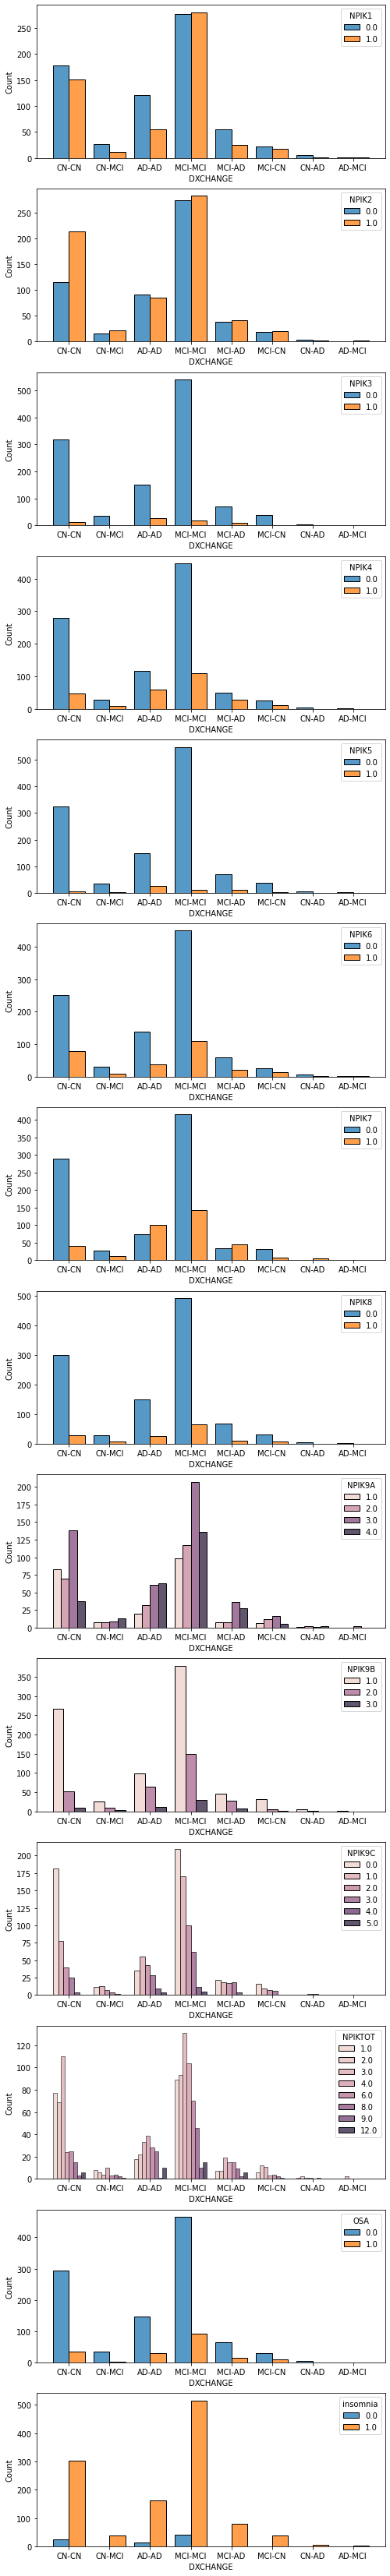

In [23]:
sleep_dxch = sleep.merge(df[com_col + ['DXCHANGE']],how='inner',on=com_col).dropna(subset=['DXCHANGE']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
#sleep_dxch_str = sleep_dxch.copy()
#sleep_dxch_str.iloc[:,3:17] = sleep_dxch_str.iloc[:,3:17].astype('Int64').astype('str')
#sleep_dxch_str.head(2)
lst = ['NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5','NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT',
        'OSA', 'insomnia']   # extract the column names of variables 
f, axes = plt.subplots(len(lst), 1,figsize=(8, 60))
for i in range(len(lst)):
    sns.histplot(data=sleep_dxch, x="DXCHANGE", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

In [24]:
sleep_dxch.groupby('DXCHANGE').count()

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia
DXCHANGE,,,,,,,,,,,,,,,,,
AD-AD,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
AD-MCI,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CN-AD,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
CN-CN,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329
CN-MCI,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
MCI-AD,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
MCI-CN,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
MCI-MCI,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558


In [25]:
# take same data size, ratio

SyntaxError: invalid syntax (<ipython-input-25-d3a595a75c47>, line 1)

### The histograms above showed us the relationship between different diagnosis changes to categorical sleep parameters. There are some interesting points:
- insomnia vs DXCHANGE: In the 3 groups without changes, around half of records have insomnia, half not. In other five changes, all records have insomnia.
- 

### Current-Diagnosis vs sleep criteria

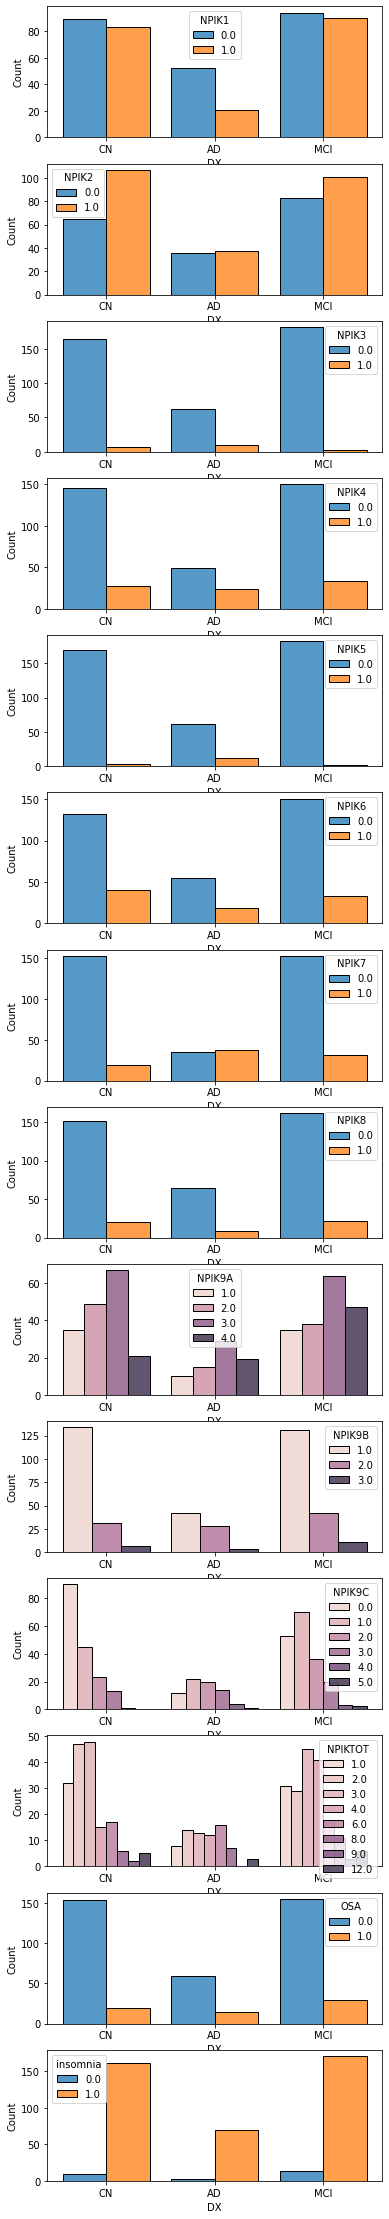

In [27]:
sleep_dx = sleep.merge(df[com_col + ['DX']],how='inner',on=com_col).dropna(subset=['DX']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
f, axes = plt.subplots(len(lst), 1,figsize=(6, 40))
for i in range(len(lst)):
    sns.histplot(data=sleep_dx, x="DX", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

### Diagnosis-baseline vs sleep criteria

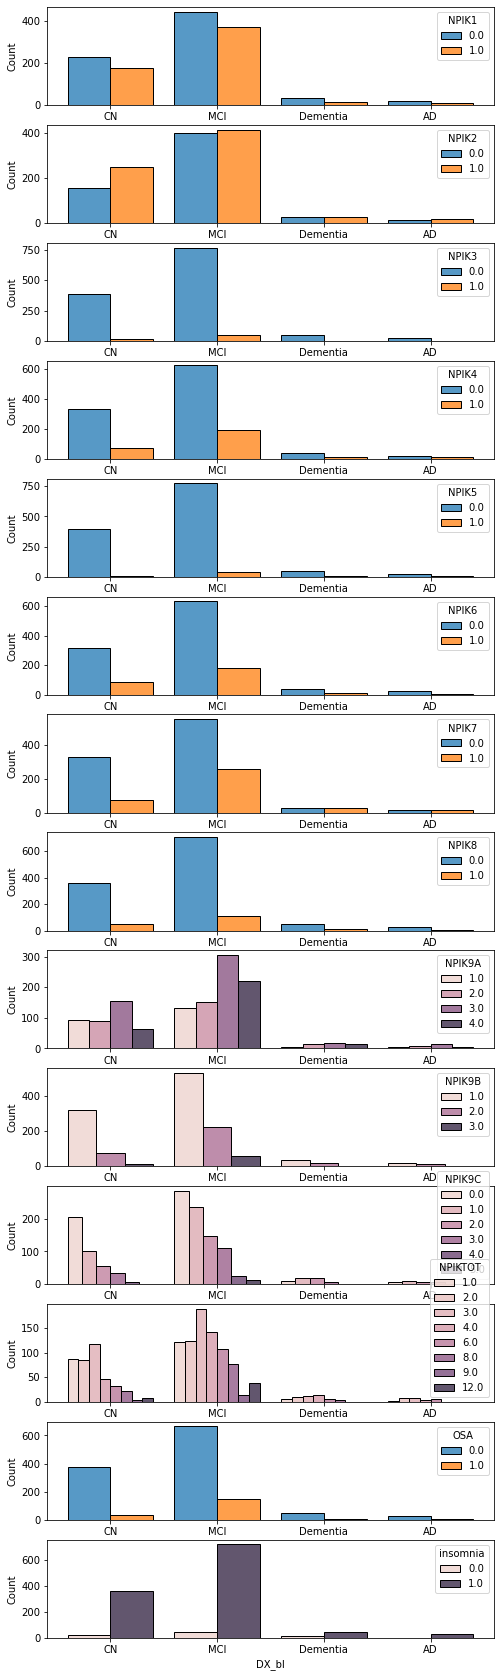

In [28]:
sleep_dxbl = sleep.merge(df[com_col + ['DX_bl']],how='inner',on=com_col).dropna(subset=['DX_bl']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
f, axes = plt.subplots(len(lst), 1,figsize=(8, 30))
for i in range(len(lst)):
    sns.histplot(data=sleep_dxbl, x="DX_bl", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

### total score of NPIK test to DXCHANGE, DX, and DX baseline

<AxesSubplot:xlabel='DX_bl', ylabel='NPIKTOT'>

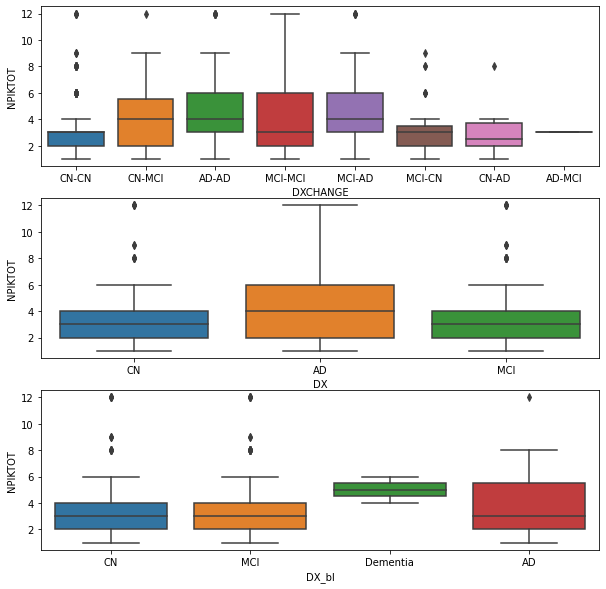

In [29]:
f, axes = plt.subplots(3, 1,figsize=(10, 10))
sns.boxplot(x=sleep_dxch["DXCHANGE"], y=sleep_dxch['NPIKTOT'], orient='v', ax=axes[0])
sns.boxplot(x=sleep_dx["DX"], y=sleep_dx['NPIKTOT'], orient='v', ax=axes[1])
sns.boxplot(x=sleep_dxbl["DX_bl"], y=sleep_dx['NPIKTOT'], orient='v', ax=axes[2])

### logistic regression, diagnosis changes as the target variable.
use dataframe sleep_dxch

In [30]:
train, test = train_test_split(sleep_dxch.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DXCHANGE']
X_test = test[lst]
y_test = test['DXCHANGE']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.457, Test set score: 0.447
lbfgs_L2,C:0.01, Training set score:0.506, Test set score: 0.439
lbfgs_L2,C:0.1, Training set score:0.507, Test set score: 0.431
lbfgs_L2,C:1, Training set score:0.508, Test set score: 0.419
lbfgs_L2,C:10, Training set score:0.511, Test set score: 0.415
lbfgs_L2,C:100, Training set score:0.512, Test set score: 0.415
saga_L1,C:0.001, Training set score:0.456, Test set score: 0.447
saga_L1,C:0.01, Training set score:0.456, Test set score: 0.447
saga_L1,C:0.1, Training set score:0.509, Test set score: 0.435
saga_L1,C:1, Training set score:0.511, Test set score: 0.427
saga_L1,C:10, Training set score:0.510, Test set score: 0.415
saga_L1,C:100, Training set score:0.512, Test set score: 0.415
newton-cg_L2,C:0.001, Training set score:0.457, Test set score: 0.447
newton-cg_L2,C:0.01, Training set score:0.506, Test set score: 0.439
newton-cg_L2,C:0.1, Training set score:0.507, Test set score: 0.431
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (982, 14)
Reduced shape: (982, 4)
explained variance: [2.84523925 1.61130217 1.25564776 1.17663941]
explained variance ratio: [0.20302442 0.11497581 0.08959779 0.08396009]
Origianl shape: (982, 14)
Reduced shape: (982, 4)
PCA components: 
[[-0.05864204  0.03077256  0.16403715  0.20747222  0.13033505  0.05759279
   0.23280841  0.09808685  0.38388109  0.48616524  0.39945667  0.54171593
   0.06276706  0.02921464]
 [-0.12624495  0.34268772  0.4539438   0.31449577  0.46732922  0.39747482
  -0.2084099   0.0367749  -0.29533904 -0.03934312  0.06563549 -0.17740816
   0.11608219 -0.04954891]
 [-0.43619124 -0.41952628  0.12668991  0.09728952  0.18528569 -0.20512074
   0.40576134  0.45654742 -0.06065081 -0.21041797  0.02628953 -0.1928501
   0.11452082  0.24450896]
 [ 0.58703115 -0.36018906  0.1352974   0.20161135  0.1434795  -0.26661027
  -0.32661054  0.33401376 -0.21335479  0.1516161   0.11577377 -0.00251652
  -0.26833338  0.05364962]]


Text(0, 0.5, 'Principal components')

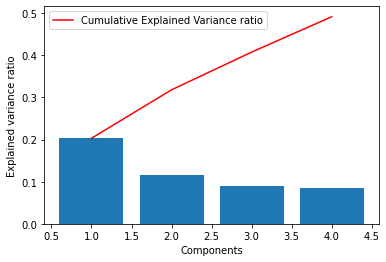

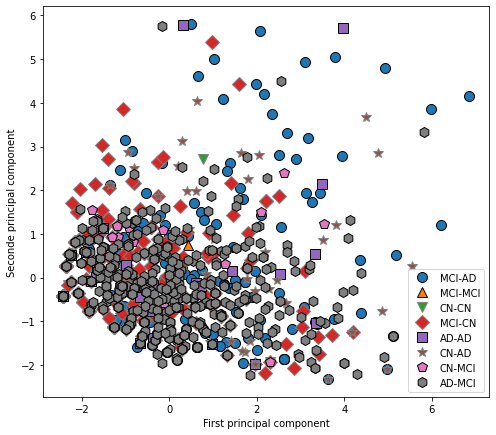

<Figure size 864x864 with 0 Axes>

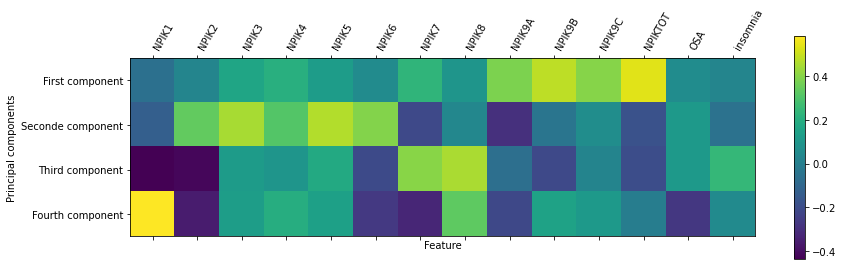

In [31]:
pca = PCA(n_components=4) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DXCHANGE'])
plt.legend(train['DXCHANGE'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [32]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.612, Test set f-score: 0.414
logistic with PCA data. C:0.001, Training set f1-score:0.627, Test set f1-score: 0.618
logistic with PCA data. C:0.01, Training set f1-score:0.577, Test set f1-score: 0.554
logistic with PCA data. C:0.1, Training set f1-score:0.553, Test set f1-score: 0.513
logistic with PCA data. C:1, Training set f1-score:0.554, Test set f1-score: 0.503
logistic with PCA data. C:10, Training set f1-score:0.552, Test set f1-score: 0.503
logistic with PCA data. C:100, Training set f1-score:0.552, Test set f1-score: 0.503
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.627 f1-score on test data: 0.6179775280898876
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.594 f1-score on test data: 0.5396327170022754
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.531 f1-score on test data: 0.4492526383020414
Decision tree with unscaled 

### feature selections from previous work

## use dataframe sleep_dx, target_variable 'DX'

In [33]:
sleep_dx

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia,DX
13,ADNI3,72,init,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,CN
15,ADNI3,72,y4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,CN
17,ADNI3,112,init,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,2.0,3.0,8.0,0.0,1.0,AD
25,ADNI3,120,init,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,CN
31,ADNI3,127,init,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,4.0,1.0,1.0,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,ADNI3,7011,bl,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,CN
1325,ADNI3,7039,bl,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,AD
1326,ADNI3,7071,bl,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,MCI
1327,ADNI3,7082,bl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,CN


In [34]:
train, test = train_test_split(sleep_dx.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DX']
X_test = test[lst]
y_test = test['DX']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.449, Test set score: 0.430
lbfgs_L2,C:0.01, Training set score:0.534, Test set score: 0.558
lbfgs_L2,C:0.1, Training set score:0.557, Test set score: 0.593
lbfgs_L2,C:1, Training set score:0.569, Test set score: 0.558
lbfgs_L2,C:10, Training set score:0.563, Test set score: 0.523
lbfgs_L2,C:100, Training set score:0.563, Test set score: 0.523
saga_L1,C:0.001, Training set score:0.434, Test set score: 0.407
saga_L1,C:0.01, Training set score:0.434, Test set score: 0.407
saga_L1,C:0.1, Training set score:0.516, Test set score: 0.605
saga_L1,C:1, Training set score:0.566, Test set score: 0.581
saga_L1,C:10, Training set score:0.563, Test set score: 0.523
saga_L1,C:100, Training set score:0.563, Test set score: 0.523
newton-cg_L2,C:0.001, Training set score:0.449, Test set score: 0.430
newton-cg_L2,C:0.01, Training set score:0.534, Test set score: 0.558
newton-cg_L2,C:0.1, Training set score:0.557, Test set score: 0.593
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (343, 14)
Reduced shape: (343, 10)
explained variance: [2.66583111 1.70674832 1.28366413 1.18650438 1.06300037 1.0100371
 0.98026123 0.95435624 0.81588843 0.70044055]
explained variance ratio: [0.18986136 0.12155517 0.09142298 0.08450323 0.07570723 0.07193517
 0.06981452 0.06796956 0.05810784 0.0498856 ]
Origianl shape: (343, 14)
Reduced shape: (343, 4)
PCA components: 
[[-0.03999118  0.06513369  0.05980643  0.1348518  -0.00732055  0.12159633
   0.25654841 -0.02248235  0.40783966  0.49161684  0.39768815  0.56869467
   0.039498   -0.00920875]
 [-0.32405129  0.11977296  0.52281561  0.35831151  0.46966388  0.29032282
   0.12554032  0.08705354 -0.21492994 -0.07863317  0.14390475 -0.17936814
   0.20419519 -0.06129009]
 [-0.00482656 -0.64360014 -0.02106522  0.05343699  0.13410553 -0.34299774
   0.27378175  0.53297693  0.01068671 -0.06838176  0.19965488 -0.04772326
  -0.02375568  0.20077232]
 [ 0.70455015 -0.21411733  0.21209748  0.20434467  0.085291   -0.06727495
  -0.3652787

Text(0, 0.5, 'Principal components')

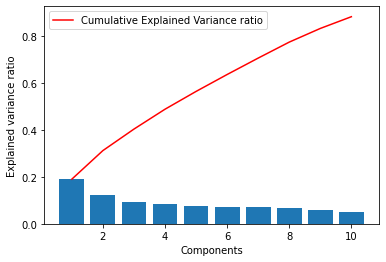

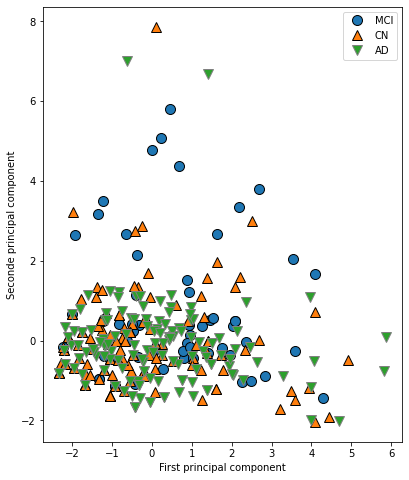

<Figure size 864x864 with 0 Axes>

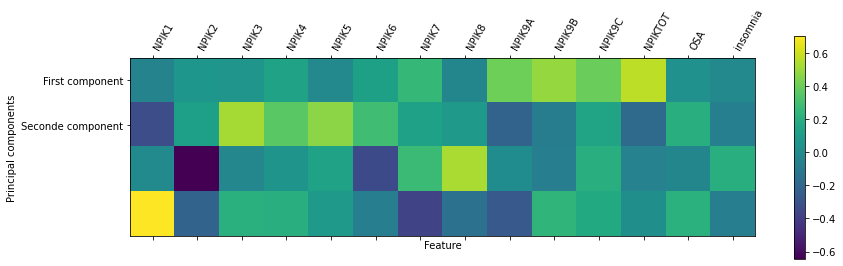

In [35]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX'])
plt.legend(train['DX'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['First component','Seconde component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [36]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.629, Test set f-score: 0.528
logistic with PCA data. C:0.001, Training set f1-score:0.579, Test set f1-score: 0.561
logistic with PCA data. C:0.01, Training set f1-score:0.528, Test set f1-score: 0.567
logistic with PCA data. C:0.1, Training set f1-score:0.526, Test set f1-score: 0.546
logistic with PCA data. C:1, Training set f1-score:0.523, Test set f1-score: 0.546
logistic with PCA data. C:10, Training set f1-score:0.523, Test set f1-score: 0.546
logistic with PCA data. C:100, Training set f1-score:0.523, Test set f1-score: 0.546
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.565 f1-score on test data: 0.5395348837209302
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.530 f1-score on test data: 0.5784404814014675
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.572 f1-score on test data: 0.6097433841218926
Decision tree with unscaled 

In [37]:
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,12],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))

MLP with scaled data. f1-score on training data: 0.850 f1-score on test data: 0.515


## use dataframe sleep_dxbl, target_variable 'DX_bl'

In [38]:
sleep_dxbl

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia,DX_bl
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,0.0,1.0,CN
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,0.0,1.0,CN
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,CN
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,CN
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,ADNI3,7011,bl,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,CN
1325,ADNI3,7039,bl,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,AD
1326,ADNI3,7071,bl,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,MCI
1327,ADNI3,7082,bl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,CN


In [39]:
train, test = train_test_split(sleep_dxbl.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DX_bl']
X_test = test[lst]
y_test = test['DX_bl']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.618, Test set score: 0.623
lbfgs_L2,C:0.01, Training set score:0.632, Test set score: 0.636
lbfgs_L2,C:0.1, Training set score:0.629, Test set score: 0.636
lbfgs_L2,C:1, Training set score:0.631, Test set score: 0.640
lbfgs_L2,C:10, Training set score:0.631, Test set score: 0.636
lbfgs_L2,C:100, Training set score:0.631, Test set score: 0.636
saga_L1,C:0.001, Training set score:0.618, Test set score: 0.623
saga_L1,C:0.01, Training set score:0.618, Test set score: 0.623
saga_L1,C:0.1, Training set score:0.632, Test set score: 0.636
saga_L1,C:1, Training set score:0.631, Test set score: 0.640
saga_L1,C:10, Training set score:0.631, Test set score: 0.640
saga_L1,C:100, Training set score:0.631, Test set score: 0.636
newton-cg_L2,C:0.001, Training set score:0.618, Test set score: 0.623
newton-cg_L2,C:0.01, Training set score:0.632, Test set score: 0.636
newton-cg_L2,C:0.1, Training set score:0.629, Test set score: 0.636
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (988, 14)
Reduced shape: (988, 10)
explained variance: [2.81401439 1.63468405 1.24061552 1.10317289 1.07693994 1.00062525
 0.9460905  0.90438745 0.80844928 0.71011171]
explained variance ratio: [0.20079759 0.11664497 0.0885257  0.07871831 0.07684642 0.07140089
 0.06750949 0.06453372 0.05768793 0.05067093]
Origianl shape: (988, 14)
Reduced shape: (988, 4)
PCA components: 
[[-0.05279106  0.01613877  0.15029535  0.20738066  0.1051353   0.05780898
   0.23454106  0.09731706  0.39265458  0.48967206  0.39589199  0.54631014
   0.04386973  0.03762523]
 [-0.18034527  0.33417666  0.45745602  0.32911015  0.4583336   0.39432325
  -0.15952374  0.05479754 -0.27580278 -0.05065769  0.08840571 -0.18125029
   0.15705434 -0.01562868]
 [-0.44756584 -0.46121109  0.08143433  0.04682071  0.2159528  -0.19522795
   0.45217779  0.44165548 -0.02173479 -0.21308401  0.00380002 -0.1696709
   0.00616991  0.13839661]
 [-0.63844654  0.40453902 -0.21547226 -0.08791107 -0.19269845  0.1391477
   0.28476825

Text(0, 0.5, 'Principal components')

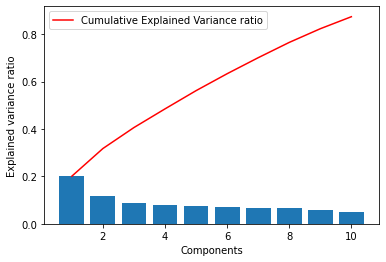

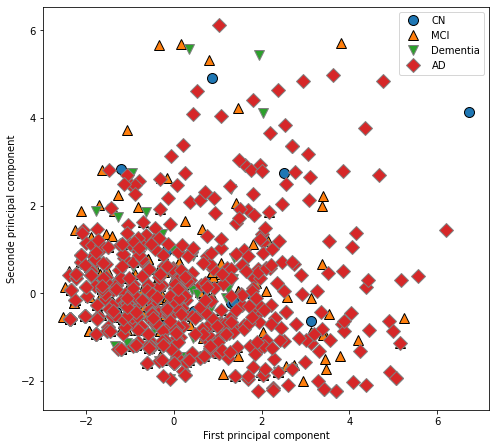

<Figure size 864x864 with 0 Axes>

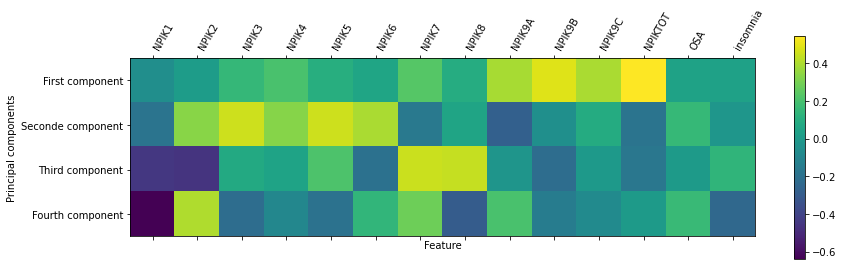

In [40]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX_bl'])
plt.legend(train['DX_bl'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [41]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.694, Test set f-score: 0.498
logistic with PCA data. C:0.001, Training set f1-score:0.764, Test set f1-score: 0.768
logistic with PCA data. C:0.01, Training set f1-score:0.757, Test set f1-score: 0.768
logistic with PCA data. C:0.1, Training set f1-score:0.742, Test set f1-score: 0.759
logistic with PCA data. C:1, Training set f1-score:0.738, Test set f1-score: 0.747
logistic with PCA data. C:10, Training set f1-score:0.738, Test set f1-score: 0.747
logistic with PCA data. C:100, Training set f1-score:0.738, Test set f1-score: 0.747
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.764 f1-score on test data: 0.7680798004987531
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.764 f1-score on test data: 0.7680798004987531
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.764 f1-score on test data: 0.7680798004987531
Decision tree with unscaled 

### neurobat.csv
The Neuropsychological Assessment Battery (NAB; Stern & White, 2003) is a comprehensive test battery that assesses five cognitive domains (Attention, Language, Memory, Spatial, and Executive Functions).

In [79]:
neubat_s = pd.read_csv('neurobat_short.csv',sep=',').iloc[:,1:].drop(['RAVLT_perc_forgetting'],axis=1).replace(-1, np.NaN).replace(-4, np.NaN)
neubat_s = neubat_s.dropna(subset=neubat_s.columns[3:],how='all').dropna(axis=1, how='all')
neubat_s

,Phase,RID,VISCODE,CLOCKCIRC,CLOCKSYM,CLOCKNUM,CLOCKHAND,CLOCKTIME,CLOCKSCOR,COPYCIRC,...,AVDELTOT,AVDELERR2,ANARTND,ANARTERR,MINTSEMCUE,MINTTOTAL,MINTUNCUED,RAVLT_forgetting,RAVLT_immediate,RAVLT_learning
0,ADNI1,1,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADNI1,2,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADNI1,2,m36,1.0,1.0,1.0,1.0,1.0,5.0,1.0,...,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADNIGO,2,m60,1.0,1.0,1.0,1.0,1.0,5.0,1.0,...,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADNI2,2,v06,1.0,1.0,1.0,1.0,1.0,5.0,1.0,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14705,ADNI3,6978,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14706,ADNI3,6979,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14707,ADNI3,6980,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14708,ADNI3,6981,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
neubat_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14638 entries, 0 to 14709
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Phase             14638 non-null  object 
 1   RID               14638 non-null  int64  
 2   VISCODE           14638 non-null  object 
 3   CLOCKCIRC         10783 non-null  float64
 4   CLOCKSYM          10783 non-null  float64
 5   CLOCKNUM          10783 non-null  float64
 6   CLOCKHAND         10783 non-null  float64
 7   CLOCKTIME         10785 non-null  float64
 8   CLOCKSCOR         10784 non-null  float64
 9   COPYCIRC          10789 non-null  float64
 10  COPYSYM           10789 non-null  float64
 11  COPYNUM           10789 non-null  float64
 12  COPYHAND          10789 non-null  float64
 13  COPYTIME          10788 non-null  float64
 14  COPYSCOR          10791 non-null  float64
 15  LMSTORY           6589 non-null   float64
 16  LIMMTOTAL         10343 non-null  float6

### brain volume

In [88]:
df = pd.read_csv('main_file.csv').iloc[:,1:]

C:\Users\weipi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [93]:
df.columns

Index(['RID', 'hypertension', 'OSA', 'anxiety', 'depression', 'PTGENDER',
       'PTETHCAT', 'PTRACCAT', 'AGE', 'PTID', 'Phase', 'VISCODE', 'DX',
       'ABETA', 'TAU', 'PTAU', 'ABETA_bl', 'TAU_bl', 'PTAU_bl', 'DXCHANGE',
       'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8',
       'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT', 'NPIKSEV', 'insomnia',
       'GDSATIS', 'GDDROP', 'GDEMPTY', 'GDBORED', 'GDSPIRIT', 'GDAFRAID',
       'GDHAPPY', 'GDHELP', 'GDHOME', 'GDMEMORY', 'GDALIVE', 'GDWORTH',
       'GDENERGY', 'GDHOPE', 'GDBETTER', 'GDTOTAL', 'GDCAT', 'LIMMTOTAL',
       'AVTOT1', 'AVTOT2', 'AVTOT3', 'AVTOT4', 'AVTOT5', 'DX_bl'],
      dtype='object')

In [97]:
neubat_s

,Phase,RID,VISCODE,CLOCKCIRC,CLOCKSYM,CLOCKNUM,CLOCKHAND,CLOCKTIME,CLOCKSCOR,COPYCIRC,...,AVDELTOT,AVDELERR2,ANARTND,ANARTERR,MINTSEMCUE,MINTTOTAL,MINTUNCUED,RAVLT_forgetting,RAVLT_immediate,RAVLT_learning
0,ADNI1,1,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADNI1,2,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADNI1,2,m36,1.0,1.0,1.0,1.0,1.0,5.0,1.0,...,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADNIGO,2,m60,1.0,1.0,1.0,1.0,1.0,5.0,1.0,...,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADNI2,2,v06,1.0,1.0,1.0,1.0,1.0,5.0,1.0,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14705,ADNI3,6978,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14706,ADNI3,6979,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14707,ADNI3,6980,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14708,ADNI3,6981,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
sleep_neub_ss_dxch = neubat_ss.merge(sleep_dxch,how='inner',on=com_col)
sleep_neub_ss_dxch

,Phase,RID,VISCODE,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5,NPIK1,...,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia,DXCHANGE
0,ADNI2,8,v41,14.0,4.0,7.0,7.0,5.0,7.0,0.0,...,0.0,1.0,0.0,4.0,2.0,1.0,8.0,0.0,1.0,CN-MCI
1,ADNI2,8,v06,16.0,5.0,8.0,11.0,12.0,11.0,1.0,...,0.0,0.0,0.0,3.0,2.0,0.0,6.0,0.0,1.0,CN-CN
2,ADNI2,31,v11,21.0,6.0,11.0,13.0,12.0,14.0,0.0,...,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,CN-CN
3,ADNI2,31,v06,22.0,9.0,13.0,13.0,15.0,14.0,0.0,...,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,CN-CN
4,ADNI2,31,v21,11.0,6.0,12.0,13.0,12.0,14.0,0.0,...,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,CN-CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,ADNI3,6888,y1,12.0,4.0,7.0,9.0,8.0,10.0,1.0,...,0.0,0.0,0.0,3.0,1.0,2.0,3.0,0.0,1.0,MCI-MCI
963,ADNI3,6890,y1,15.0,4.0,8.0,8.0,10.0,9.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,MCI-MCI
964,ADNI3,6891,y1,6.0,4.0,5.0,6.0,6.0,6.0,1.0,...,0.0,1.0,0.0,4.0,2.0,3.0,8.0,0.0,1.0,AD-AD
965,ADNI3,6897,y1,12.0,6.0,8.0,12.0,11.0,12.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,MCI-MCI


In [114]:
neubat_ss = pd.read_csv('neurobat_supershort.csv').dropna(how='any').iloc[:,1:]
neubat_ss

,Phase,RID,VISCODE,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5
2,ADNI2,2,v11,13.0,5.0,5.0,8.0,9.0,10.0
3,ADNI2,2,v41,11.0,5.0,5.0,6.0,8.0,10.0
4,ADNI2,2,v51,14.0,7.0,6.0,6.0,8.0,10.0
5,ADNI3,2,init,14.0,4.0,7.0,8.0,8.0,8.0
6,ADNI2,2,v06,15.0,6.0,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...
15132,ADNI3,6969,y1,18.0,4.0,8.0,10.0,12.0,13.0
15140,ADNI3,6976,y1,13.0,7.0,6.0,8.0,9.0,6.0
15145,ADNI3,6978,y1,15.0,3.0,8.0,12.0,13.0,12.0
15177,ADNI3,6999,y1,12.0,6.0,7.0,8.0,14.0,13.0


In [106]:
# quick check PCA

def PCA_(df_X,n):
    # data scaling
    scaler = StandardScaler()
    scaler.fit(df_X)
    X_scaled = scaler.transform(df_X)
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    print("Origianl shape: {}".format(str(X_scaled.shape)))
    print("Reduced shape: {}".format(str(X_pca.shape)))
    print("explained variance: {}".format(pca.explained_variance_))
    print("explained variance ratio: {}".format(pca.explained_variance_ratio_))
    plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Components')
    plt.plot(range(1,len(pca.explained_variance_ )+1),
             np.cumsum(pca.explained_variance_ratio_),
             c='red',
             label="Cumulative Explained Variance ratio")
    plt.legend(loc='upper left')


Origianl shape: (6921, 6)
Reduced shape: (6921, 4)
explained variance: [4.83864984 0.49274701 0.32974549 0.15465138]
explained variance ratio: [0.80632512 0.08211263 0.05494964 0.02577151]


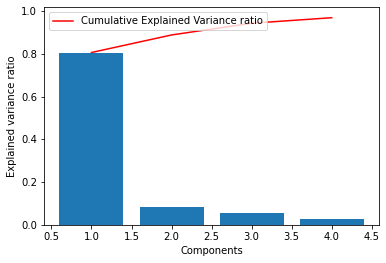

In [115]:
PCA_(neubat_ss.iloc[:,3:],4)

In [126]:
adni_new = pd.read_csv('adnimerge_new.csv',sep=',').iloc[:,1:]
adni_new

,RID,PTID,Phase,VISCODE,EXAMDATE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,...,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,ratio_ICV_bl,ratio_ABETA_bl,ratio_TAU_bl,ratio_PTAU_bl,EXAMDATE_bl,duration_in_days
0,2,011_S_0002,ADNI1,bl,2005-09-08,118233.0,8336.0,1229740.0,4177.0,16559.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2005-09-08,0.0
1,3,011_S_0003,ADNI1,bl,2005-09-12,84599.0,5319.0,1129830.0,1791.0,15506.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2005-09-12,0.0
2,3,011_S_0003,ADNI1,m06,2006-03-13,88580.0,5446.0,1100060.0,2427.0,14400.0,...,1.023877,0.973651,1.355109,0.928673,0.992576,NaN,NaN,NaN,2005-09-12,182.0
3,3,011_S_0003,ADNI1,m12,2006-09-12,90099.0,5157.0,1095640.0,1596.0,14617.0,...,0.969543,0.969739,0.891122,0.942667,0.991217,0.811059,1.050063,1.059133,2005-09-12,365.0
4,3,011_S_0003,ADNI1,m24,2007-09-12,97420.0,5139.0,1088560.0,1175.0,14033.0,...,0.966159,0.963472,0.656058,0.905005,0.991008,NaN,NaN,NaN,2005-09-12,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16160,6352,033_S_6352,ADNI3,m36,2021-06-15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-07,1104.0
16161,4288,003_S_4288,ADNI2,m132,2022-09-30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-08,3979.0
16162,6512,127_S_6512,ADNI3,m48,2022-09-28,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-13,1476.0
16163,6996,003_S_6996,ADNI3,m12,2022-09-30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-27,368.0


In [128]:
adni_sleep = pd.merge(adni_new,sleep, how = 'outer', on=com_col)
adni_sleep

,RID,PTID,Phase,VISCODE,EXAMDATE,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,...,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,OSA,insomnia
0,2,011_S_0002,ADNI1,bl,2005-09-08,118233.0,8336.0,1229740.0,4177.0,16559.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,3,011_S_0003,ADNI1,bl,2005-09-12,84599.0,5319.0,1129830.0,1791.0,15506.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,3,011_S_0003,ADNI1,m06,2006-03-13,88580.0,5446.0,1100060.0,2427.0,14400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,3,011_S_0003,ADNI1,m12,2006-09-12,90099.0,5157.0,1095640.0,1596.0,14617.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
4,3,011_S_0003,ADNI1,m24,2007-09-12,97420.0,5139.0,1088560.0,1175.0,14033.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28843,7102,NaN,ADNI3,sc,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
28844,7103,NaN,ADNI3,sc,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
28845,7104,NaN,ADNI3,sc,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
28846,7105,NaN,ADNI3,sc,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [135]:
len(adni_sleep[adni_sleep['insomnia']==1]),len(adni_sleep[adni_sleep['insomnia']==0]),len(adni_sleep)

(15142, 840, 28848)

In [67]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))


plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DXCHANGE'])
plt.legend(train['DXCHANGE'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values